In [47]:
from utils import *

In [48]:
results_path = 'results/'
result_files = os.listdir(results_path)
print(result_files)
thresh = 0.5

['bert-base-uncased_toxic_classification_FGSM_0.25_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_0.01_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_0.1_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_1.0_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_0.5_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_2.0_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_4.0_results.pkl', 'bert-base-uncased_toxic_classification_FGSM_8.0_results.pkl', 'bert-base-uncased_toxic_classification_PGD_0.5_results.pkl', 'bert-base-uncased_toxic_classification_PGD_0.01_results.pkl', 'bert-base-uncased_toxic_classification_PGD_0.1_results.pkl', 'bert-base-uncased_toxic_classification_PGD_0.25_results.pkl', 'bert-base-uncased_toxic_classification_PGD_1.0_results.pkl', 'bert-base-uncased_toxic_classification_PGD_2.0_results.pkl', 'bert-base-uncased_toxic_classification_PGD_4.0_results.pkl', 'bert-base-uncased_toxic_classification_PGD_8.0_results.p

# FGSM Alphas Results

In [49]:
# load pickled results
FGSM_results = []
FGSM_results_files = []
for result_file in result_files:
    if 'FGSM' in result_file:
        with open(results_path + result_file, 'rb') as f:
            FGSM_results.append(pickle.load(f))
            FGSM_results_files.append(result_file)

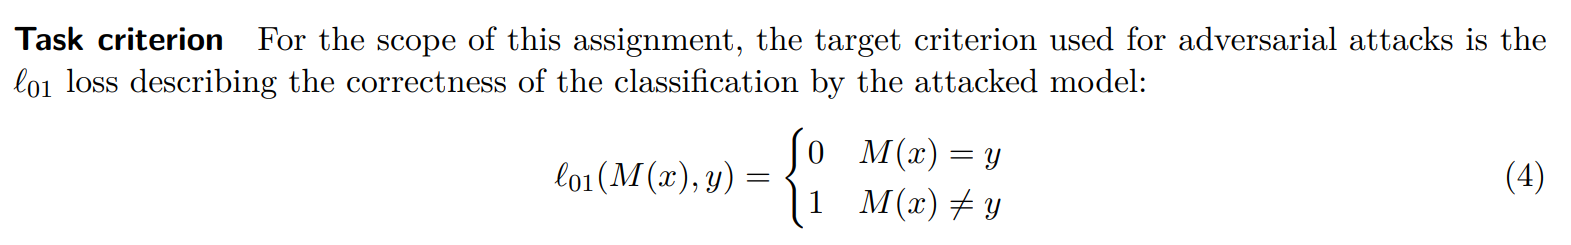

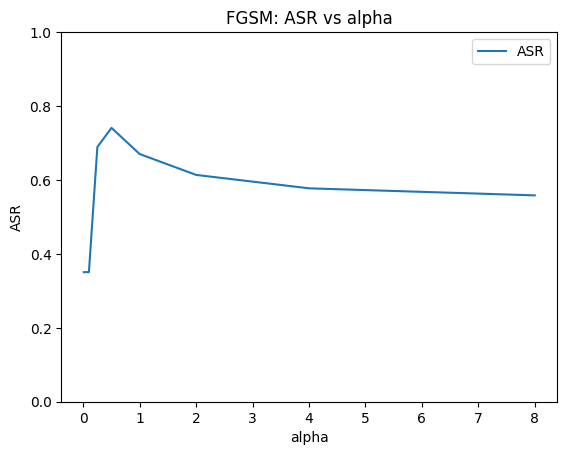

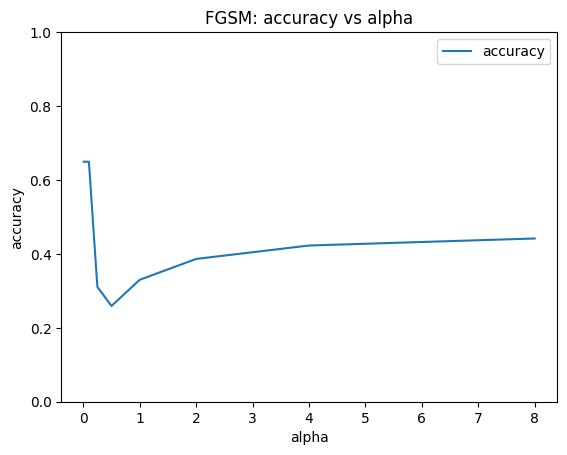

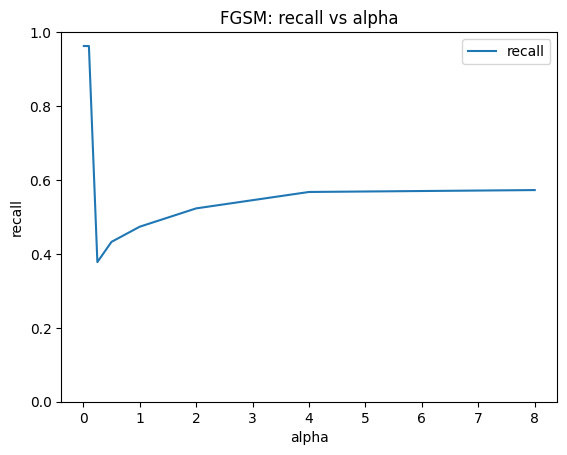

In [50]:
alpha_ablation_dict = {}
for result, result_file in zip(FGSM_results, FGSM_results_files):
    alpha = float(result_file.split('_')[4])
    result_raw_metrics = [result[r] for r in result]
    true_labels = [r['true_label'] for r in result_raw_metrics]
    predicted_labels = [r['perturbed_text_pred'] > thresh for r in result_raw_metrics]

    # l (0-1) loss - 1 if true != predicted
    l_loss = [int(true != pred) for true, pred in zip(true_labels, predicted_labels)]
    ASR = np.mean(l_loss)
    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    alpha_ablation_dict[alpha] = {'ASR': ASR, 'accuracy': accuracy, 'recall': recall}
    # print(f'alpha: {alpha}, ASR: {ASR}, accuracy: {accuracy}')


alpha_ablation_dict = dict(sorted(alpha_ablation_dict.items()))
alphas = list(alpha_ablation_dict.keys())
ASRs = [alpha_ablation_dict[a]['ASR'] for a in alphas]
accuracies = [alpha_ablation_dict[a]['accuracy'] for a in alphas]
recalls = [alpha_ablation_dict[a]['recall'] for a in alphas]

# plot ASR
plt.plot(alphas, ASRs, label='ASR')
plt.xlabel('alpha')
plt.ylabel('ASR')
plt.ylim(0, 1)
plt.title('FGSM: ASR vs alpha')
plt.legend()
plt.show()

# plot accuracy
plt.plot(alphas, accuracies, label='accuracy')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title('FGSM: accuracy vs alpha')
plt.legend()
plt.show()

# plot recall
plt.plot(alphas, recalls, label='recall')
plt.xlabel('alpha')
plt.ylabel('recall')
plt.ylim(0, 1)
plt.title('FGSM: recall vs alpha')
plt.legend()
plt.show()

# PGD Alphas Results

In [51]:
# load pickled results
PGD_results = []
PGD_results_files = []
for result_file in result_files:
    # for now, to filter other proceeding experiments from here
    if 'PGD' in result_file and len(result_file.split('_')) == 6:
        with open(results_path + result_file, 'rb') as f:
            PGD_results.append(pickle.load(f))
            PGD_results_files.append(result_file)

alpha: 0.5, ASR: 0.5920888055034397, accuracy: 0.4079111944965603, recall: 0.8205128205128205
alpha: 0.01, ASR: 0.3505315822388993, accuracy: 0.6494684177611006, recall: 0.9623931623931624
alpha: 0.1, ASR: 0.37570356472795496, accuracy: 0.624296435272045, recall: 0.9521367521367521
alpha: 0.25, ASR: 0.48639774859287055, accuracy: 0.5136022514071295, recall: 0.9162393162393162
alpha: 1.0, ASR: 0.6832395247029394, accuracy: 0.31676047529706064, recall: 0.7025641025641025
alpha: 2.0, ASR: 0.7424953095684803, accuracy: 0.2575046904315197, recall: 0.5794871794871795
alpha: 4.0, ASR: 0.7801751094434022, accuracy: 0.21982489055659787, recall: 0.49572649572649574
alpha: 8.0, ASR: 0.806910569105691, accuracy: 0.19308943089430894, recall: 0.39145299145299145


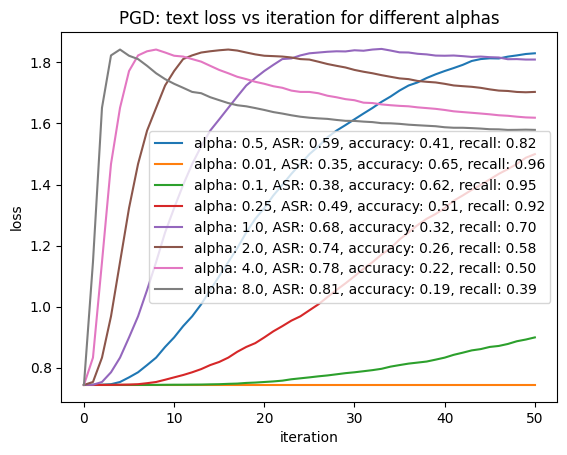

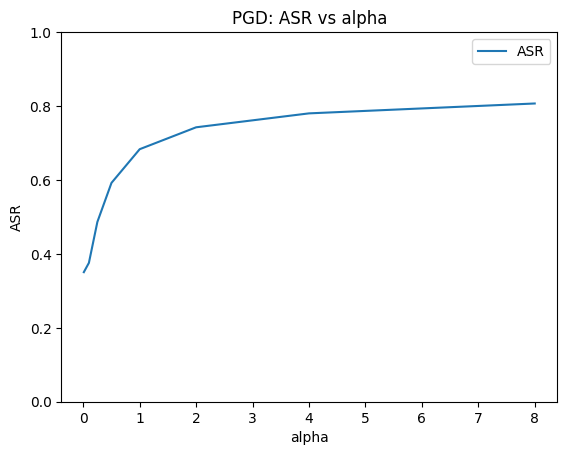

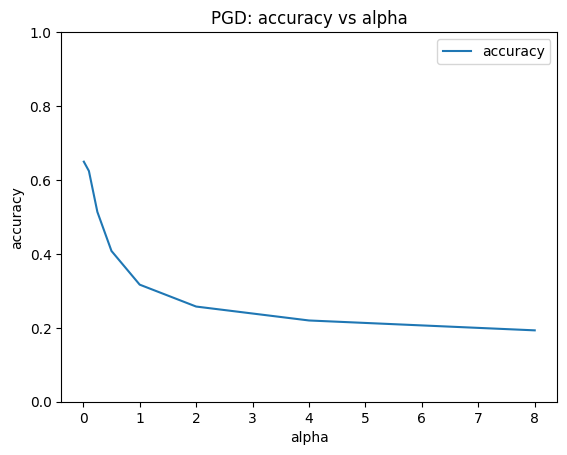

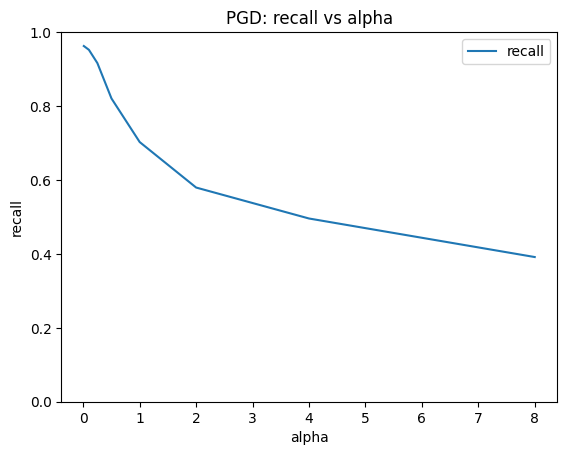

In [52]:
alpha_ablation_dict = {}
for result, result_file in zip(PGD_results, PGD_results_files):
    alpha = float(result_file.split('_')[4])
    result_raw_metrics = [result[r] for r in result]
    true_labels = [r['true_label'] for r in result_raw_metrics]
    predicted_labels = [r['perturbed_text_pred'] > thresh for r in result_raw_metrics]

    # l (0-1) loss - 1 if true != predicted
    l_loss = [int(true != pred) for true, pred in zip(true_labels, predicted_labels)]
    ASR = np.mean(l_loss)
    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    alpha_ablation_dict[alpha] = {'ASR': ASR, 'accuracy': accuracy, 'recall': recall}

    print(f'alpha: {alpha}, ASR: {ASR}, accuracy: {accuracy}, recall: {recall}')

    try:
        loss_lists = np.array([r['loss_list'] for r in result_raw_metrics])
    except:
        continue
    mean_loss_list = np.mean(loss_lists, axis=0)
    # plot loss vs iterations
    plt.plot(mean_loss_list, label=f'alpha: {alpha}, ASR: {ASR:.2f}, accuracy: {accuracy:.2f}, recall: {recall:.2f}')
PGD_best_results = PGD_results[-1]

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('PGD: text loss vs iteration for different alphas')
plt.legend()
plt.show()

alpha_ablation_dict = dict(sorted(alpha_ablation_dict.items()))
alphas = list(alpha_ablation_dict.keys())
ASRs = [alpha_ablation_dict[a]['ASR'] for a in alphas]
accuracies = [alpha_ablation_dict[a]['accuracy'] for a in alphas]
recalls = [alpha_ablation_dict[a]['recall'] for a in alphas]

# plot ASR
plt.plot(alphas, ASRs, label='ASR')
plt.xlabel('alpha')
plt.ylabel('ASR')
plt.ylim(0, 1)
plt.title('PGD: ASR vs alpha')
plt.legend()
plt.show()

# plot accuracy
plt.plot(alphas, accuracies, label='accuracy')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title('PGD: accuracy vs alpha')
plt.legend()
plt.show()

# plot recall
plt.plot(alphas, recalls, label='recall')
plt.xlabel('alpha')
plt.ylabel('recall')
plt.ylim(0, 1)
plt.title('PGD: recall vs alpha')
plt.legend()
plt.show()

### Printing Examples For Fun

In [53]:
count = 0
for i, (k, v) in enumerate(PGD_best_results.items()):
    if v['true_label'] == 0:
        continue
    print('label: ', v['true_label'])
    print(k)
    print(v['perturbed_text'])
    print(f"Original Pred: {v['original_text_pred']}")
    print(f"Perturbed Pred: {v['perturbed_text_pred']}")

    count += 1
    if count == 50:
        break

label:  1
apologies of a father!!! i apologise on behalf of my son, who is mentally retarded ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
apologies of a father!!! i apologise on behalf of my son, who is mentally retarded! timer secret secret forgot forgot forgot forgot forgot forgot forgot forgot forgot forgot forgot forgot forgot dream forget scouts
Original Pred: 0.8440403938293457
Perturbed Pred: 0.03331950306892395
label:  1
: : oh yes and you will burn in hell for trying to steal korean land. fuck you you fucking nip. ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
: : oh yes and you will burn in hell for trying to steal korean land. fuck you you fucking nip.!!!!!!!!!!!!!!!!!!!!
Original Pred: 0.9974108338356018
Perturbed Pred: 0.9974108338356018
label:  1
: : you ' re all dishonest weirdos on the english wiki ( why??????!?!?!? ~ ~ ~ ~ ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
: : you ' re all dishonest weirdos on the english wiki ( why??????!?!?!? ~ ~ ~ ~! event party program program program ev

# PGD text projection frequency

## With Embedding Projection

In [54]:
# load pickled results
PGD_freq_emb_results = []
PGD_freq_emb_results_files = []
for result_file in result_files:
    splitted = result_file.split('_')
    # for now, to filter other proceeding experiments from here
    if 'PGD' in result_file and len(splitted) == 8 and splitted[6] == "True":
        print(result_file)
        with open(results_path + result_file, 'rb') as f:
            PGD_freq_emb_results.append(pickle.load(f))
            PGD_freq_emb_results_files.append(result_file)

bert-base-uncased_toxic_classification_PGD_2.0_1_True_results.pkl


text_proj_freq: 1.0, ASR: 0.8042526579111945, accuracy: 0.1957473420888055, recall: 0.4666666666666667


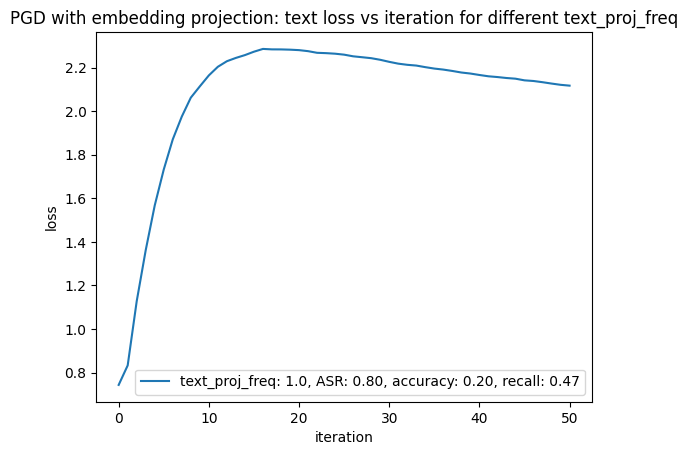

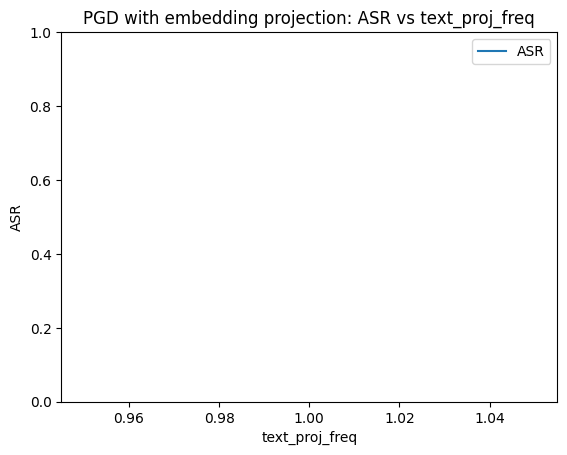

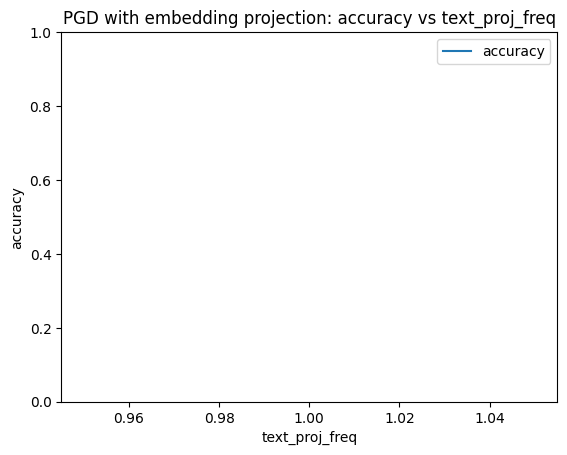

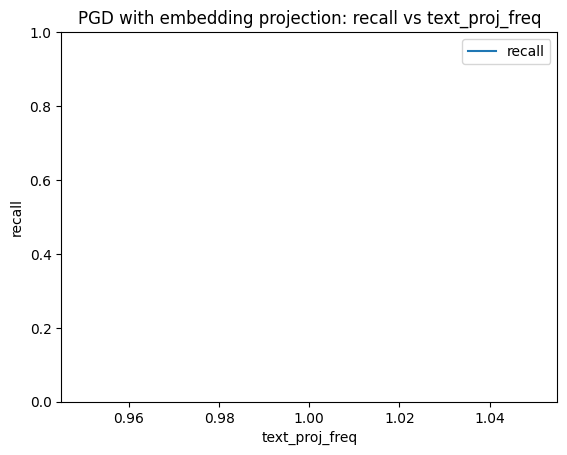

In [56]:
proj_ablation_dict = {}
for result, result_file in zip(PGD_freq_emb_results, PGD_freq_emb_results_files):
    text_proj_freq = float(result_file.split('_')[5])
    result_raw_metrics = [result[r] for r in result]
    true_labels = [r['true_label'] for r in result_raw_metrics]
    predicted_labels = [r['perturbed_text_pred'] > thresh for r in result_raw_metrics]

    # l (0-1) loss - 1 if true != predicted
    l_loss = [int(true != pred) for true, pred in zip(true_labels, predicted_labels)]
    ASR = np.mean(l_loss)
    accuracy = accuracy_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    proj_ablation_dict[text_proj_freq] = {'ASR': ASR, 'accuracy': accuracy, 'recall': recall}

    print(f'text_proj_freq: {text_proj_freq}, ASR: {ASR}, accuracy: {accuracy}, recall: {recall}')

    try:
        loss_lists = np.array([r['loss_list'] for r in result_raw_metrics])
    except:
        continue
    mean_loss_list = np.mean(loss_lists, axis=0)
    # plot loss vs iterations
    plt.plot(mean_loss_list, label=f'text_proj_freq: {text_proj_freq}, ASR: {ASR:.2f}, accuracy: {accuracy:.2f}, recall: {recall:.2f}')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('PGD with embedding projection: text loss vs iteration for different text_proj_freq')
plt.legend()
plt.show()

proj_ablation_dict = dict(sorted(proj_ablation_dict.items()))
text_proj_freqs = list(proj_ablation_dict.keys())
ASRs = [proj_ablation_dict[a]['ASR'] for a in text_proj_freqs]
accuracies = [proj_ablation_dict[a]['accuracy'] for a in text_proj_freqs]
recalls = [proj_ablation_dict[a]['recall'] for a in text_proj_freqs]

# plot ASR
plt.plot(text_proj_freqs, ASRs, label='ASR')
plt.xlabel('text_proj_freq')
plt.ylabel('ASR')
plt.ylim(0, 1)
plt.title('PGD with embedding projection: ASR vs text_proj_freq')
plt.legend()
plt.show()

# plot accuracy
plt.plot(text_proj_freqs, accuracies, label='accuracy')
plt.xlabel('text_proj_freq')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title('PGD with embedding projection: accuracy vs text_proj_freq')
plt.legend()
plt.show()

# plot recall
plt.plot(text_proj_freqs, recalls, label='recall')
plt.xlabel('text_proj_freq')
plt.ylabel('recall')
plt.ylim(0, 1)
plt.title('PGD with embedding projection: recall vs text_proj_freq')
plt.legend()
plt.show()

## Without Embedding Projection

In [ ]:
# load pickled results
PGD_freq_wo_emb_results = []
PGD_freq_wo_emb_results_files = []
for result_file in result_files:
    splitted = result_file.split('_')
    # for now, to filter other proceeding experiments from here
    if 'PGD' in result_file and len(splitted) == 8 and splitted[6] == "False":
        print(result_file)
        with open(results_path + result_file, 'rb') as f:
            PGD_freq_wo_emb_results.append(pickle.load(f))
            PGD_freq_wo_emb_results_files.append(result_file)

In [ ]:
proj_ablation_dict = {}
for result, result_file in zip(PGD_freq_wo_emb_results, PGD_freq_wo_emb_results_files):
    text_proj_freq = float(result_file.split('_')[5])
    result_raw_metrics = [result[r] for r in result]
    true_labels = [r['true_label'] for r in result_raw_metrics]
    predicted_labels = [r['perturbed_text_pred'] > thresh for r in result_raw_metrics]

    # l (0-1) loss - 1 if true != predicted
    l_loss = [int(true != pred) for true, pred in zip(true_labels, predicted_labels)]
    ASR = np.mean(l_loss)
    accuracy = accuracy_score(true_labels, predicted_labels)
    proj_ablation_dict[text_proj_freq] = {'ASR': ASR, 'accuracy': accuracy}

    print(f'text_proj_freq: {text_proj_freq}, ASR: {ASR}, accuracy: {accuracy}')

    try:
        loss_lists = np.array([r['loss_list'] for r in result_raw_metrics])
    except:
        continue
    mean_loss_list = np.mean(loss_lists, axis=0)
    # plot loss vs iterations
    plt.plot(mean_loss_list, label=f'text_proj_freq: {text_proj_freq}, ASR: {ASR:.2f}, accuracy: {accuracy:.2f}')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('PGD without embedding projection: text loss vs iteration for different text_proj_freq')
plt.legend()
plt.show()

# plot ASR
proj_ablation_dict = dict(sorted(proj_ablation_dict.items()))
text_proj_freqs = list(proj_ablation_dict.keys())
ASRs = [proj_ablation_dict[a]['ASR'] for a in text_proj_freqs]
accuracies = [proj_ablation_dict[a]['accuracy'] for a in text_proj_freqs]
plt.plot(text_proj_freqs, ASRs, label='ASR')
plt.xlabel('text_proj_freq')
plt.ylabel('ASR')
plt.ylim(0, 1)
plt.title('PGD without embedding projection: ASR vs text_proj_freq')
plt.legend()
plt.show()

# plot accuracy
plt.plot(text_proj_freqs, accuracies, label='accuracy')
plt.xlabel('text_proj_freq')
plt.ylabel('accuracy')
plt.ylim(0, 1)
plt.title('PGD without embedding projection: accuracy vs text_proj_freq')
plt.legend()
plt.show()

# OLD

In [ ]:
# load pickled results
results = []
for result_file in result_files:
    with open(results_path + result_file, 'rb') as f:
        results.append(pickle.load(f))

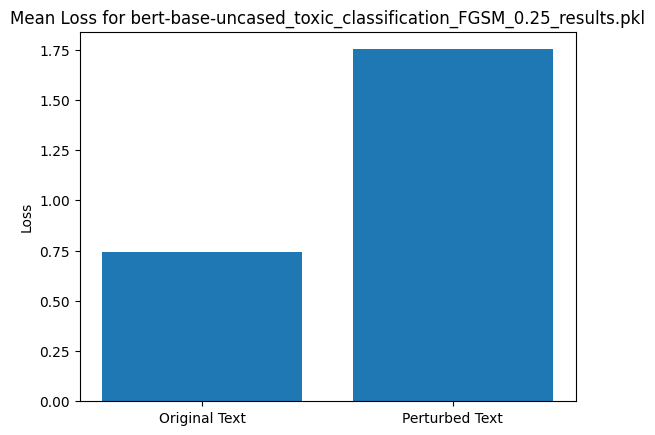

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.31081926203877425
Original Recall: 0.9623931623931624
Perturbed Recall: 0.37777777777777777


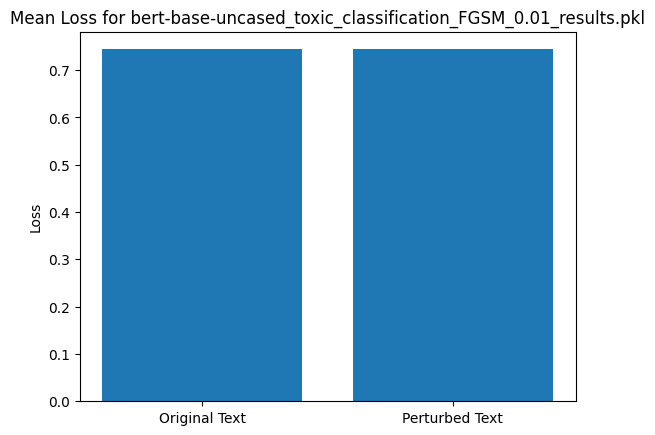

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.6494684177611006
Original Recall: 0.9623931623931624
Perturbed Recall: 0.9623931623931624


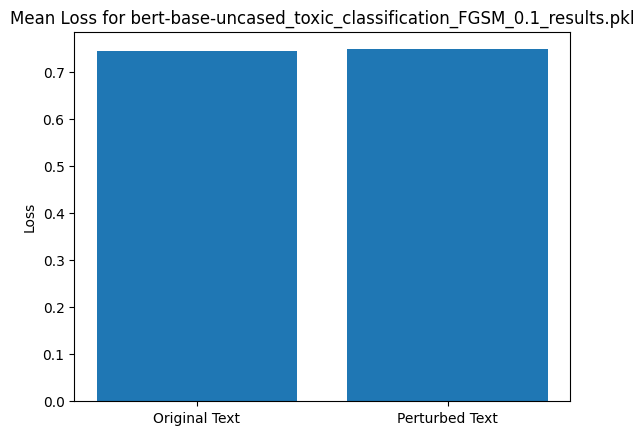

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.6493120700437773
Original Recall: 0.9623931623931624
Perturbed Recall: 0.9623931623931624


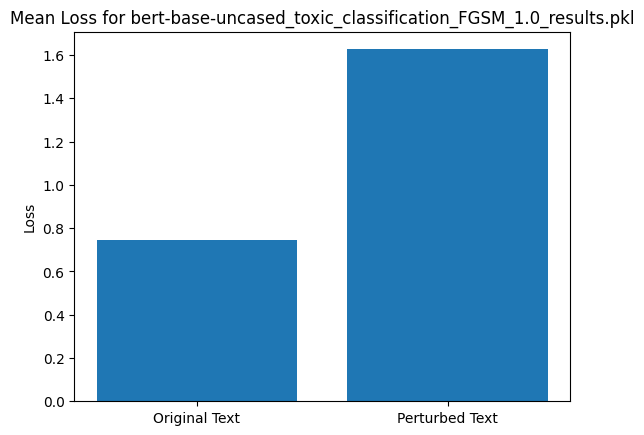

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.32989368355222015
Original Recall: 0.9623931623931624
Perturbed Recall: 0.4735042735042735


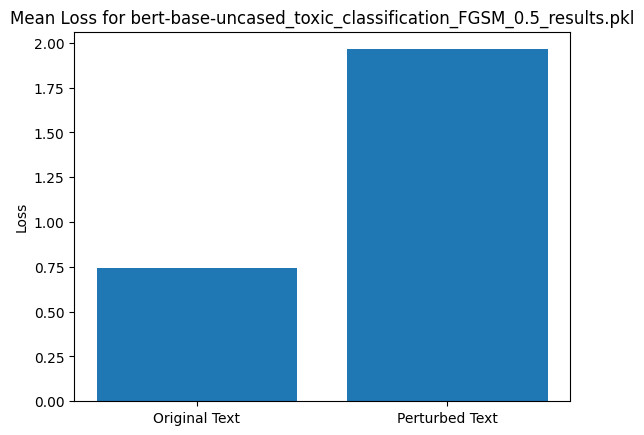

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.259068167604753
Original Recall: 0.9623931623931624
Perturbed Recall: 0.4324786324786325


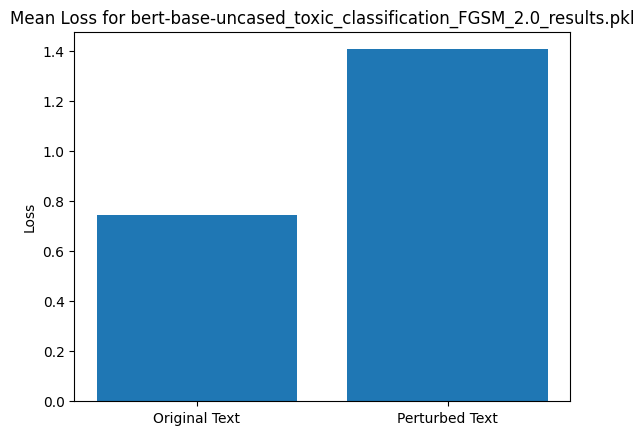

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.3863352095059412
Original Recall: 0.9623931623931624
Perturbed Recall: 0.5230769230769231


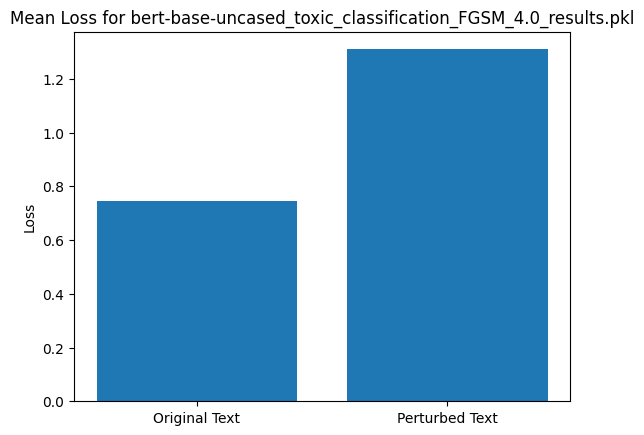

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.4226078799249531
Original Recall: 0.9623931623931624
Perturbed Recall: 0.5675213675213675


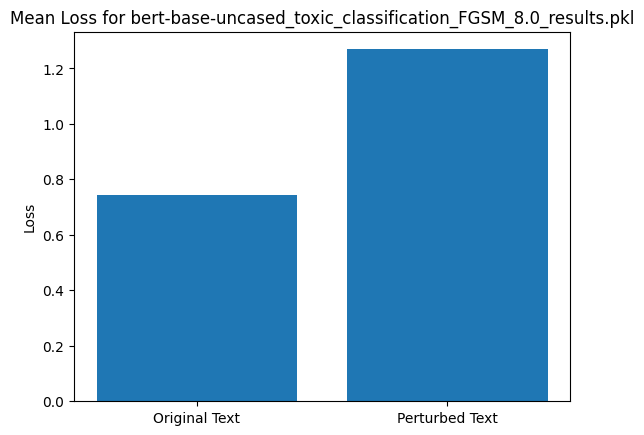

Original Accuracy: 0.6494684177611006
Perturbed Accuracy: 0.441682301438399
Original Recall: 0.9623931623931624
Perturbed Recall: 0.5726495726495726


In [ ]:
for result, result_file in zip(results, result_files):
    result_raw_metrics = [result[r] for r in result]
    mean_original_text_loss = np.mean([r['original_text_loss'] for r in result_raw_metrics])
    mean_perturbed_text_loss = np.mean([r['perturbed_text_loss'] for r in result_raw_metrics]) # change to perturbed_text_loss

    # bar plot
    fig, ax = plt.subplots()
    ax.bar(['Original Text', 'Perturbed Text'], [mean_original_text_loss, mean_perturbed_text_loss])
    ax.set_ylabel('Loss')
    ax.set_title('Mean Loss for ' + result_file)
    plt.show()

    true_labels = [r['true_label'] for r in result_raw_metrics]
    thresh = 0.5
    original_pred_labels = [r['original_text_pred'] > thresh for r in result_raw_metrics]
    perturbed_pred_labels = [r['perturbed_text_pred'] > thresh for r in result_raw_metrics]

    # imports
    # accuracy
    original_accuracy = accuracy_score(true_labels, original_pred_labels)
    perturbed_accuracy = accuracy_score(true_labels, perturbed_pred_labels)

    # recall
    original_recall = recall_score(true_labels, original_pred_labels)
    perturbed_recall = recall_score(true_labels, perturbed_pred_labels)

    print('Original Accuracy:', original_accuracy)
    print('Perturbed Accuracy:', perturbed_accuracy)
    print('Original Recall:', original_recall)
    print('Perturbed Recall:', perturbed_recall)

In [ ]:
count = 0
for i, (k, v) in enumerate(results[0].items()):
    if v['true_label'] == 0:
        continue
    print('label: ', v['true_label'])
    print(k)
    print(v['perturbed_text'])
    print(v['original_text_pred'])
    print(v['perturbed_text_pred'])

    count += 1
    if count == 10:
        break

label:  1
apologies of a father!!! i apologise on behalf of my son, who is mentally retarded ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
apologies of a father!!! i apologise on behalf of my son, who is mentally retarded! 2d manor smile mystery mystery wish promise concepts! forgot object object memory memory memory 2 am (!
0.8440403938293457
0.3228527307510376
label:  1
: : oh yes and you will burn in hell for trying to steal korean land. fuck you you fucking nip. ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
: : oh yes and you will burn in hell for trying to steal korean land. fuck you you fucking nip.! | event ~ ~ event event event event event event event ~ ~ event avalon vanguard ~ project publication
0.9974108338356018
0.6801586747169495
label:  1
: : you ' re all dishonest weirdos on the english wiki ( why??????!?!?!? ~ ~ ~ ~ ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
: : you ' re all dishonest weirdos on the english wiki ( why??????!?!?!? ~ ~ ~ ~! power event system story function function pr

# Visualize Embeddings

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transformer_model = 'bert-base-uncased'
model = AutoModel.from_pretrained(transformer_model, weights_only=True).to(device)
tokenizer = AutoTokenizer.from_pretrained(transformer_model)

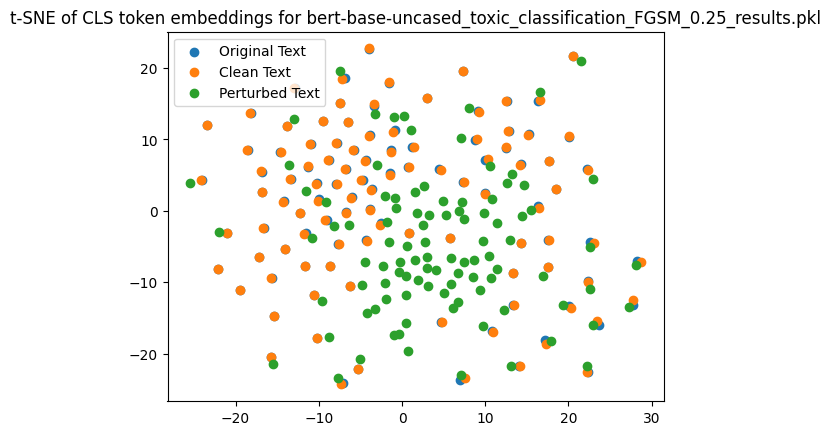

In [ ]:
for result, result_file in zip(results, result_files):
    all_original_text = [r for r in result]
    all_perturbed_text = [result[r]['perturbed_text'] for r in result]
    num_samples = 100
    # sample 100 random samples
    random_indices = np.random.choice(len(all_original_text), num_samples, replace=False)

    original_text_samples = [all_original_text[i] for i in random_indices]
    suffix_size = 20
    clean_text_samples = [original[:-suffix_size] for original in original_text_samples]
    perturbed_text_samples = [all_perturbed_text[i] for i in random_indices]

    # get embeddings of CLS token
    original_cls_embeddings = []
    clean_cls_embeddings = []
    perturbed_cls_embeddings = []
    for original_text, clean_text, perturbed_text in zip(original_text_samples, clean_text_samples, perturbed_text_samples):
        original_cls_embeddings.append(get_cls_token_embedding(original_text, model, tokenizer, device))
        clean_cls_embeddings.append(get_cls_token_embedding(clean_text, model, tokenizer, device))
        perturbed_cls_embeddings.append(get_cls_token_embedding(perturbed_text, model, tokenizer, device))

    # Move the tensors to the CPU and convert them to numpy arrays
    original_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in original_cls_embeddings])
    clean_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in clean_cls_embeddings])
    perturbed_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in perturbed_cls_embeddings])

    # Concatenate original and perturbed embeddings
    all_cls_embeddings = np.concatenate((original_cls_embeddings, clean_cls_embeddings, perturbed_cls_embeddings))

    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=0)

    # Perform t-SNE transformation
    all_cls_embeddings_tsne = tsne.fit_transform(all_cls_embeddings)

    # Split the embeddings back into original and perturbed
    original_cls_embeddings_tsne = all_cls_embeddings_tsne[:num_samples]
    clean_cls_embeddings_tsne = all_cls_embeddings_tsne[num_samples:2*num_samples]
    perturbed_cls_embeddings_tsne = all_cls_embeddings_tsne[2*num_samples:]

    # plot
    fig, ax = plt.subplots()
    ax.scatter(original_cls_embeddings_tsne[:, 0], original_cls_embeddings_tsne[:, 1], label='Original Text')
    ax.scatter(clean_cls_embeddings_tsne[:, 0], clean_cls_embeddings_tsne[:, 1], label='Clean Text')
    ax.scatter(perturbed_cls_embeddings_tsne[:, 0], perturbed_cls_embeddings_tsne[:, 1], label='Perturbed Text')
    ax.legend()
    ax.set_title('t-SNE of CLS token embeddings for ' + result_file)
    plt.show()

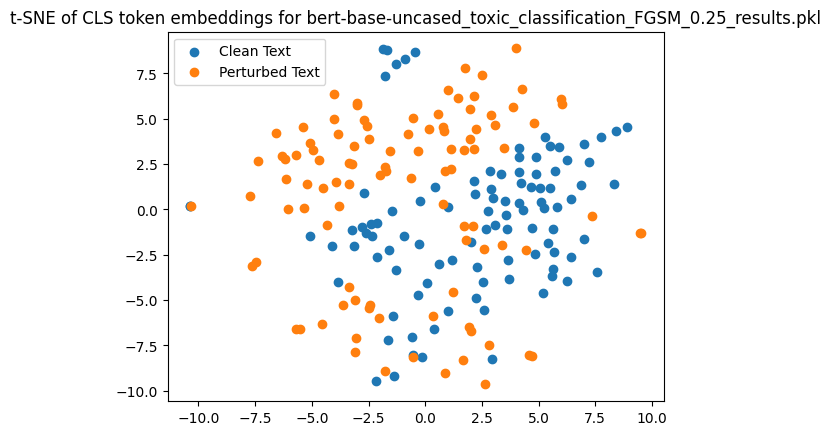

In [ ]:
for result, result_file in zip(results, result_files):
    all_original_text = [r for r in result]
    all_perturbed_text = [result[r]['perturbed_text'] for r in result]
    all_clean_labels = [result[r]['true_label'] for r in result]
    all_perturbed_labels = [result[r]['perturbed_text_pred'] > 0.5 for r in result]

    num_samples = 100
    # sample 100 random samples
    random_indices = np.random.choice(len(all_original_text), num_samples, replace=False)

    suffix_size = 20
    clean_text_samples = [original[:-suffix_size] for original in original_text_samples]
    perturbed_text_samples = [all_perturbed_text[i] for i in random_indices]
    clean_labels_samples = [all_clean_labels[i] for i in random_indices]
    perturbed_labels_samples = [all_perturbed_labels[i] for i in random_indices]

    # get embeddings of CLS token
    original_cls_embeddings = []
    clean_cls_embeddings = []
    perturbed_cls_embeddings = []
    for original_text, clean_text, perturbed_text in zip(original_text_samples, clean_text_samples, perturbed_text_samples):
        clean_cls_embeddings.append(get_cls_token_embedding(clean_text, model, tokenizer, device))
        perturbed_cls_embeddings.append(get_cls_token_embedding(perturbed_text, model, tokenizer, device))

    # Move the tensors to the CPU and convert them to numpy arrays
    clean_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in clean_cls_embeddings])
    perturbed_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in perturbed_cls_embeddings])

    # Concatenate original and perturbed embeddings
    all_cls_embeddings = np.concatenate((clean_cls_embeddings, perturbed_cls_embeddings))

    # Initialize t-SNE
    tsne = TSNE(n_components=2, random_state=0)

    # Perform t-SNE transformation
    all_cls_embeddings_tsne = tsne.fit_transform(all_cls_embeddings)

    # Split the embeddings back into original and perturbed
    clean_cls_embeddings_tsne = all_cls_embeddings_tsne[:num_samples]
    perturbed_cls_embeddings_tsne = all_cls_embeddings_tsne[num_samples:]

    # plot
    fig, ax = plt.subplots()
    ax.scatter(clean_cls_embeddings_tsne[:, 0], clean_cls_embeddings_tsne[:, 1], label='Clean Text')
    ax.scatter(perturbed_cls_embeddings_tsne[:, 0], perturbed_cls_embeddings_tsne[:, 1], label='Perturbed Text')
    ax.legend()
    ax.set_title('t-SNE of CLS token embeddings for ' + result_file)
    plt.show()

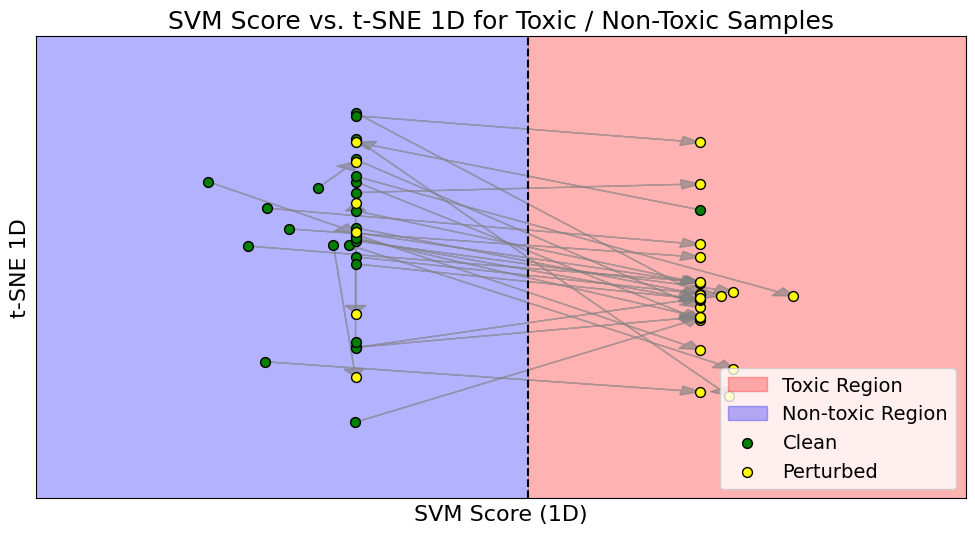

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import os
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patheffects as pe

for result, result_file in zip(results, result_files):
    all_original_text = [r for r in result]
    all_perturbed_text = [result[r]['perturbed_text'] for r in result]
    all_clean_labels = [result[r]['true_label'] for r in result]
    all_perturbed_labels = [result[r]['perturbed_text_pred'] > 0.5 for r in result]

    num_samples = 30
    # sample 100 random samples
    random_indices = np.random.choice(len(all_original_text), num_samples, replace=False)

    suffix_size = 20
    clean_text_samples = [original[:-suffix_size] for original in original_text_samples]
    perturbed_text_samples = [all_perturbed_text[i] for i in random_indices]
    clean_labels_samples = [all_clean_labels[i] for i in random_indices]
    perturbed_labels_samples = [all_perturbed_labels[i] for i in random_indices]

    # get embeddings of CLS token
    clean_cls_embeddings = []
    perturbed_cls_embeddings = []
    for original_text, clean_text, perturbed_text in zip(original_text_samples, clean_text_samples, perturbed_text_samples):
        clean_cls_embeddings.append(get_cls_token_embedding(clean_text, model, tokenizer, device))
        perturbed_cls_embeddings.append(get_cls_token_embedding(perturbed_text, model, tokenizer, device))

    # Move the tensors to the CPU and convert them to numpy arrays
    clean_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in clean_cls_embeddings])
    perturbed_cls_embeddings = np.array([embedding.cpu().detach().numpy().squeeze() for embedding in perturbed_cls_embeddings])


    # Convert labels to numpy arrays and ensure they are integers
    clean_labels = np.array(clean_labels_samples).astype(int)
    perturbed_labels = np.array(perturbed_labels_samples).astype(int)

    # Combine embeddings and labels from clean and perturbed samples
    all_embeddings = np.concatenate((clean_cls_embeddings, perturbed_cls_embeddings))
    all_labels = np.concatenate((clean_labels, perturbed_labels))

    # --- Compute 1D t-SNE Embeddings ---
    tsne = TSNE(n_components=1, random_state=0)
    tsne_values = tsne.fit_transform(all_embeddings).squeeze()  # shape: (total_samples,)

    # --- Train a Linear SVM on the 1D t-SNE values ---
    svm = SVC(kernel='linear')
    svm.fit(all_embeddings, all_labels)
    # Get SVM decision function (the signed distance to the hyperplane)
    svm_scores = svm.decision_function(all_embeddings)

    # --- Define Plot Limits ---
    x_min, x_max = svm_scores.min() - 1, svm_scores.max() + 1
    y_min, y_max = tsne_values.min() - 1, tsne_values.max() + 1

    # Create a meshgrid for background region coloring
    x_values = np.linspace(x_min, x_max, 500)
    y_values = np.linspace(y_min, y_max, 500)
    xx, yy = np.meshgrid(x_values, y_values)
    # Here, we assign region based solely on the SVM score (i.e. x-axis value)
    regions = np.where(xx < 0, -1, 1)

    # Define colors for regions and points:
    non_toxic_color = "#0000FF"  # Blue for non-toxic region
    toxic_color = "#FF0000"      # Red for toxic region
    clean_color = "#008000"      # Green for clean points
    perturbed_color = "#FFFF00"  # Yellow for perturbed points

    plt.figure(figsize=(12, 6))
    plt.title("SVM Score vs. t-SNE 1D for Toxic / Non-Toxic Samples", fontsize=18)

    # Plot background regions based on SVM decision function (x < 0: non-toxic, x ≥ 0: toxic)
    plt.contourf(xx, yy, regions, levels=[-2, 0, 2],
                 colors=[non_toxic_color, toxic_color], alpha=0.3)

    # Draw arrows connecting each clean point to its perturbed counterpart
    for i in range(num_samples):
        clean_idx = i
        perturbed_idx = i + num_samples
        dx = svm_scores[perturbed_idx] - svm_scores[clean_idx]
        dy = tsne_values[perturbed_idx] - tsne_values[clean_idx]
        plt.arrow(
            svm_scores[clean_idx], tsne_values[clean_idx],
            dx, dy,
            head_width=0.02 * (y_max - y_min),  # relative arrowhead size
            head_length=0.02 * (x_max - x_min),
            length_includes_head=True,
            color="gray",
            linestyle="-",
            alpha=0.6,
            zorder=1
        )
    # Scatter plot clean and perturbed points with different markers and colors
    clean_points = plt.scatter(svm_scores[:num_samples], tsne_values[:num_samples],
                color=clean_color, marker="o", s=50, label="Clean", edgecolors="k", zorder=2)
    perturbed_points = plt.scatter(svm_scores[num_samples:], tsne_values[num_samples:],
                color=perturbed_color, marker="o", s=50, label="Perturbed", edgecolors="k", zorder=2)

    # Draw SVM decision boundary at x = 0
    plt.axvline(x=0, color="black", linestyle="--", zorder=3, label="SVM Decision Boundary")

    plt.xlabel("SVM Score (1D)", fontsize=16)
    plt.ylabel("t-SNE 1D", fontsize=16)
    plt.xticks([])  # Optionally remove x-ticks
    plt.yticks([])  # Optionally remove y-ticks
    plt.legend(loc="lower right", fontsize=14)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)


    region_legend_elements = [
    Patch(facecolor=toxic_color, edgecolor=toxic_color, alpha=0.3, label="Toxic Region"),
    Patch(facecolor=non_toxic_color, edgecolor=non_toxic_color, alpha=0.3, label="Non-toxic Region"),
    clean_points,
    perturbed_points
    ]

    # Add the legend with all custom elements and increased font size
    plt.legend(handles=region_legend_elements, loc="lower right", fontsize=14)

    # Optionally save the plot as a PDF (uncomment the following lines if needed)
    # if not os.path.exists("plots/"):
    #     os.makedirs("plots/")
    # plt.savefig("plots/svm_tsne_toxic_nontoxic.pdf", bbox_inches='tight')
    plt.show()